# 匯入模組

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
np.random.seed(10)

Using TensorFlow backend.


# a. iris資料集介紹

In [2]:
all_df = pd.read_csv(r"C:\Users\user\Downloads\IRIS.csv")

In [3]:
all_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
cols=['sepal_length','sepal_width','petal_length' ,'petal_width', 'species'] 
all_df=all_df[cols] 

In [5]:
all_df[cols]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# b. 資料預處理(data preprocessing)

In [6]:
all_df['species'] = all_df['species'].map({'Iris-setosa':0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).astype(int)

In [7]:
X = all_df.values[:,:4]   #x為特徵值，:4為前四筆
Y = all_df.values[:,4]    #y為類別資料，第4筆為類別資料

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [9]:
Y_train_OneHot = np_utils.to_categorical(Y_train)
Y_test_OneHot = np_utils.to_categorical(Y_test)

In [10]:
print('total:',len(all_df),
      'train:',len(X_train),
      'test:',len(X_test))

total: 150 train: 105 test: 45


# c. 建立模型

In [11]:
model = Sequential()

In [12]:
model.add(Dense(units=6, input_dim=4,
                kernel_initializer='uniform',
                activation='relu'))

In [13]:
model.add(Dense(units=6, 
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=3, 
                kernel_initializer='uniform', 
                activation='softmax'))

In [16]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 21        
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________
None


# d.訓練模型

In [17]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [18]:
train_history=model.fit(x=X_train,
                        y=Y_train_OneHot,validation_split=0.3, 
                        epochs=100, batch_size=5,verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 73 samples, validate on 32 samples
Epoch 1/100





 - 0s - loss: 1.0989 - acc: 0.2603 - val_loss: 1.0987 - val_acc: 0.2813
Epoch 2/100
 - 0s - loss: 1.0987 - acc: 0.2740 - val_loss: 1.0985 - val_acc: 0.3125
Epoch 3/100
 - 0s - loss: 1.0985 - acc: 0.3562 - val_loss: 1.0984 - val_acc: 0.3125
Epoch 4/100
 - 0s - loss: 1.0983 - acc: 0.4384 - val_loss: 1.0980 - val_acc: 0.4375
Epoch 5/100
 - 0s - loss: 1.0969 - acc: 0.3973 - val_loss: 1.0960 - val_acc: 0.4688
Epoch 6/100
 - 0s - loss: 1.0946 - acc: 0.7260 - val_loss: 1.0917 - val_acc: 0.7188
Epoch 7/100
 - 0s - loss: 1.0902 - acc: 0.6712 - val_loss: 1.0837 - val_acc: 0.7188
Epoch 8/100
 - 0s - loss: 1.0816 - acc: 0.6712 - val_loss: 1.0706 - val_acc: 0.7188
Epoch 9/100
 - 0s - loss: 1.0681 - acc: 0.6164 - val_loss: 1.0491 - val_acc: 0.6563
Epoch 10/100
 - 0s - loss: 1.0472 - acc: 0.6164 - val_loss: 1.0204 - val_acc: 0.6875
Epoch 11/100


Epoch 76/100
 - 0s - loss: 0.5741 - acc: 0.7397 - val_loss: 0.5470 - val_acc: 0.7500
Epoch 77/100
 - 0s - loss: 0.5718 - acc: 0.7260 - val_loss: 0.5407 - val_acc: 0.7188
Epoch 78/100
 - 0s - loss: 0.5674 - acc: 0.7397 - val_loss: 0.5405 - val_acc: 0.7500
Epoch 79/100
 - 0s - loss: 0.5657 - acc: 0.7260 - val_loss: 0.5349 - val_acc: 0.7500
Epoch 80/100
 - 0s - loss: 0.5607 - acc: 0.7397 - val_loss: 0.5327 - val_acc: 0.7500
Epoch 81/100
 - 0s - loss: 0.5577 - acc: 0.7397 - val_loss: 0.5295 - val_acc: 0.7500
Epoch 82/100
 - 0s - loss: 0.5551 - acc: 0.7397 - val_loss: 0.5263 - val_acc: 0.7500
Epoch 83/100
 - 0s - loss: 0.5519 - acc: 0.7397 - val_loss: 0.5215 - val_acc: 0.7500
Epoch 84/100
 - 0s - loss: 0.5495 - acc: 0.7260 - val_loss: 0.5171 - val_acc: 0.7500
Epoch 85/100
 - 0s - loss: 0.5467 - acc: 0.7397 - val_loss: 0.5147 - val_acc: 0.7500
Epoch 86/100
 - 0s - loss: 0.5423 - acc: 0.7397 - val_loss: 0.5111 - val_acc: 0.7500
Epoch 87/100
 - 0s - loss: 0.5400 - acc: 0.7397 - val_loss: 0.506

# e.以圖形顯示訓練過程的loss & accuracy

In [19]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

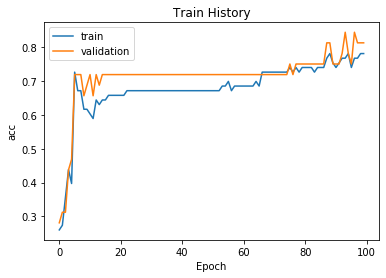

In [20]:
show_train_history(train_history,'acc','val_acc')

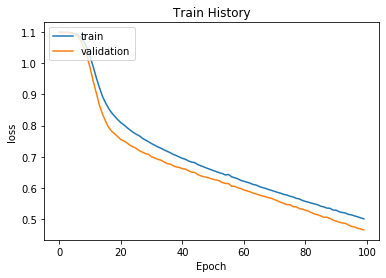

In [21]:
show_train_history(train_history,'loss','val_loss')

# f.評估模型準確率

In [22]:
scores = model.evaluate(X_test,Y_test_OneHot)
print('Test accuracy:', scores[1])

45/45 [==============================] - 0s 44us/step
Test accuracy: 0.6888888915379842


# g.進行預測

In [23]:
prediction=model.predict_classes(X_test)

In [24]:
prediction

array([2, 2, 0, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0,
       2], dtype=int64)